In [ ]:
"""
Koraci po redu:
1. Dodavanje biblioteka
2. Ucitavanje podataka
3. Provera koliko ima praznih podataka po kolonama
4. Overview podataka
5. Crtanje podataka
6. Trazenje korelacija izmedju podataka
7. Igranje sa podacima
8. Puno igranja sa podacima (Izbacivanje, modifikovanje)
9. Razdvajanje kolone koje pogadjamo i atributa (X i y) + Train test split 
10. Normalizacija
11. Kreiranje modela i dodavanje slojeva
12. Treniranje
13. Evaluacija nakon treniranja (plotovanje podataka loss-ova) i analiza
14. Cross validacija
15. Predikcija
16. Evaluacija
"""

In [40]:
#1. Dodavanje biblioteka
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [4]:
#2. Ucitavanje podataka 
df = pd.read_csv("TF_2_Notebooks_and_Data/DATA/kc_house_data.csv") 

In [6]:
#3. Provera koliko ima praznih podataka po kolonama
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
#4. Overview podataka
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<Figure size 1000x600 with 0 Axes>

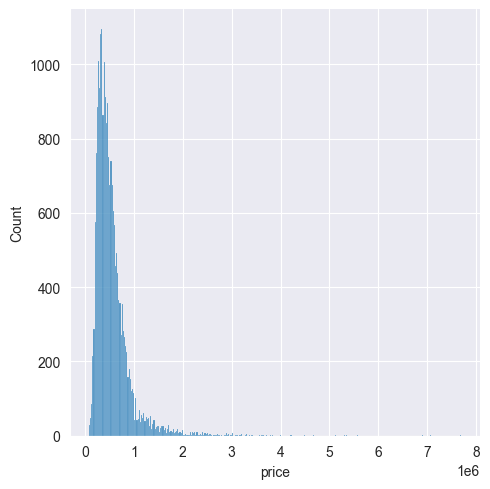

In [8]:
# 5. Crtanje podataka
#Prikazivanje histograma cena kuca
plt.figure(figsize=(10,6))
sns.displot(df['price'])
#sns.histplot(df['bedrooms'],binwidth=0.5,color='red',stat='count', binrange=[1,8], discrete=True)

In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [40]:
df1 = df.drop('date', axis=1)

In [52]:
# 6. Trazenje korelacija izmedju podataka
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [59]:
#Sortiramo relacije u za price
df1.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='bedrooms', ylabel='price'>

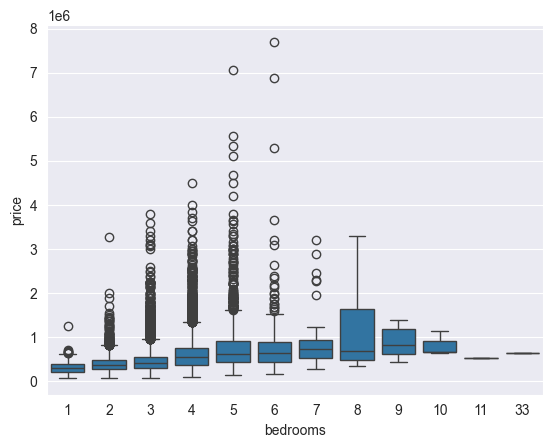

In [62]:
#Relacija izmedju cene i kvadrature
#sns.scatterplot(x='price',y='sqft_living', data=df)
sns.boxplot(x='bedrooms', y='price', data=df)

Text(0.5, 1.0, 'Price vs Longitude')

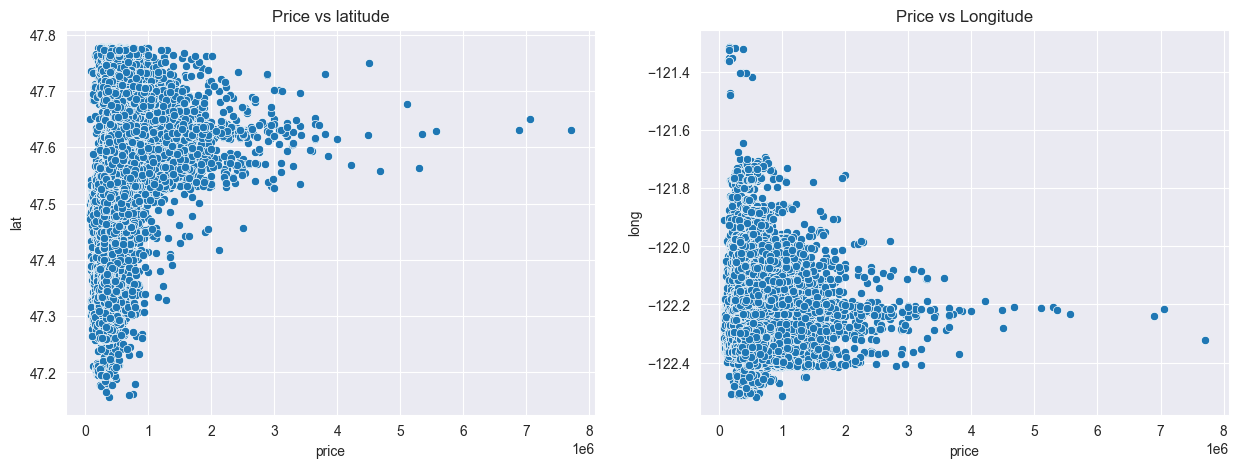

In [73]:
# 7. Igranje sa podacima
# 8. Puno igranja sa podacima (Izbacivanje, modifikovanje)
#Gledamo distribuciju cene u odnosu na geografsku sirinu/duzinu
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(x='price', y='lat', data=df)
plt.title('Price vs latitude')

plt.subplot(1,2,2)
sns.scatterplot(x='price', y='long', data=df)
plt.title('Price vs Longitude')

<Axes: xlabel='long', ylabel='lat'>

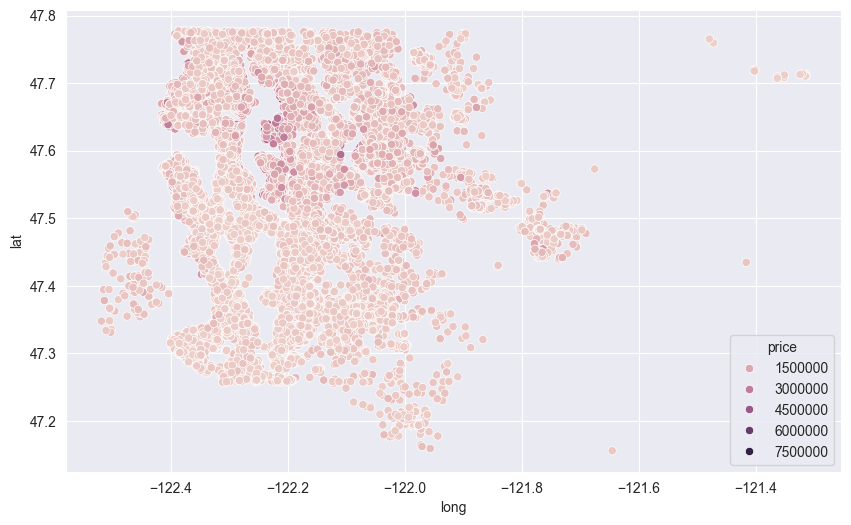

In [5]:
#Gledamo gde se nalaze geografski skuplje kuce cilj je ocistiti mapu od krajnjih slucajeva
plt.figure(figsize=(10,6))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

In [7]:
#Sortiranje prema vrednosti
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [11]:
#Dosta je veliki broj kuca sa vrednoscu preko 3 miliona (outliers), trebalo bi ih smanjiti
len(df)
len(df)*0.01

215.97

In [12]:
#Izbacivanje top 1% kuca po ceni, tj. uzimanje svih kuca koje nisu u top 1%
#To se radi tako sto napravimo novi DataFrame koji je sortiran u opadajucem redosledu i nadjemo koliko je 1% od ukupnog data frame-a len(df)*0.01
#Potrebno je samo iz tog sortiranog DF-a izabrati sve od 216. indexa do kraja
#Gubimo samo 1% informacija, ali sa manje outliers
non_top_1_perc = df.sort_values('price', ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

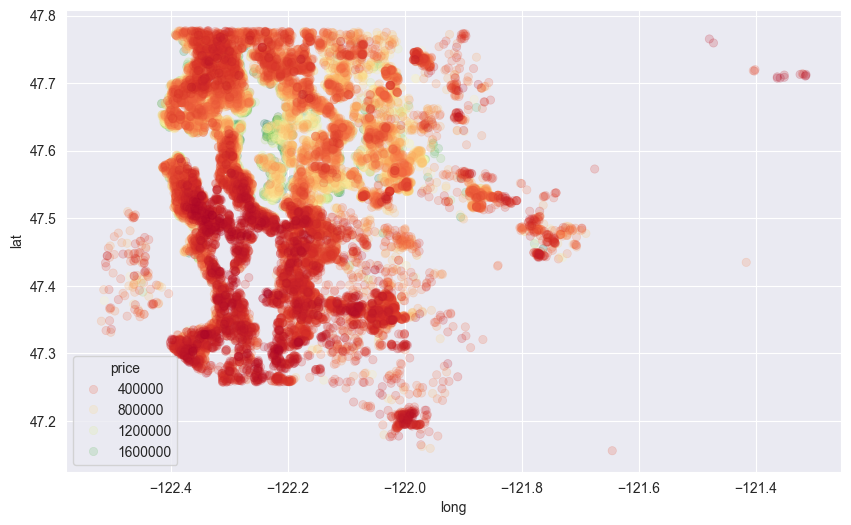

In [15]:
#Provera da li smo uspeli da dobijemo mapu koja ima manje-vise jednu boju
#Cilj je igrati se sa podacima i pokusati da izvuces sto vise podataka iz te igre
plt.figure(figsize=(10,6))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, hue='price', edgecolor=None, alpha=0.2,  palette='RdYlGn')

<Axes: xlabel='waterfront', ylabel='price'>

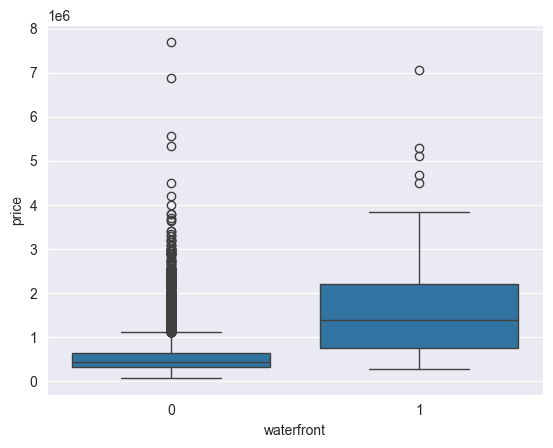

In [16]:
#Provera da li je nesto na Waterfront - te nekretnine su skuplje
sns.boxplot(x='waterfront', y='price', data=df)

In [22]:
#Izbacivanje kolona koje nam ne znace nista
#Gledamo koje kolone su nam potrebne
df.head()
df = df.drop('id', axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#Konverzija kolone datum koja je string u datetime object
df['date']
df['date'] = pd.to_datetime(df['date'])

In [25]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [ ]:
def year_extraction(date):
    return date.year

In [6]:
#Trazimo jos atributa/feature-a iz samog data seta. Verovatno je cilj naci korelaciju izmedju datuma(godine prodaje) i cene
df['year'] = df['date'].apply(lambda date: date.year) 
df['month'] = df['date'].apply(lambda date: date.month) 

In [27]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<Axes: xlabel='month', ylabel='price'>

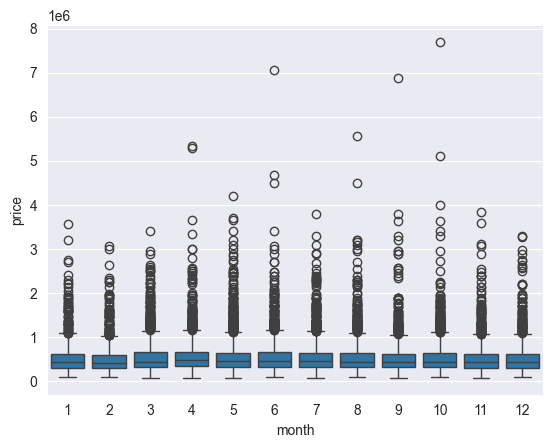

In [29]:
sns.boxplot(x='month', y='price', data=df)

<Axes: xlabel='year', ylabel='count'>

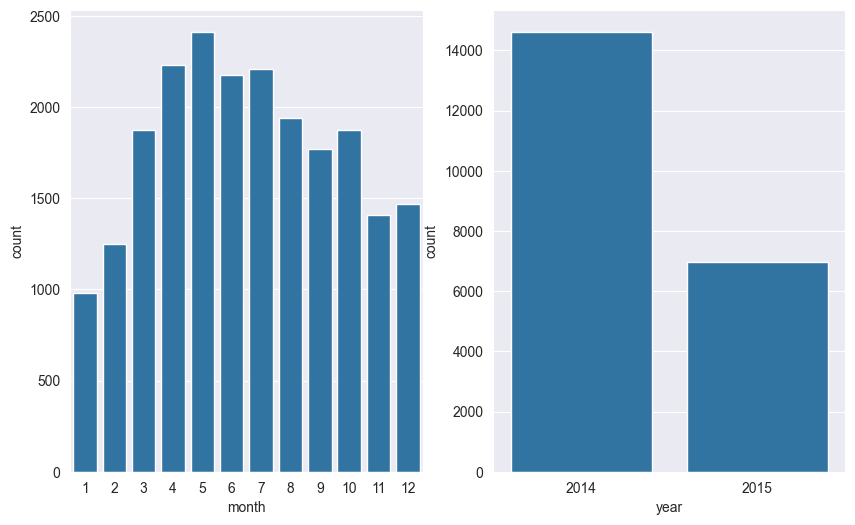

In [40]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(x='month', data=df) #Najveca prodaja je od 5. do 7. meseca 
plt.subplot(1,2,2)
sns.countplot(x='year', data=df) #Moze se primetiti da je bila duplo veca prodaja u 2014
#df[df['year'] == 2015].count()

<Axes: xlabel='month'>

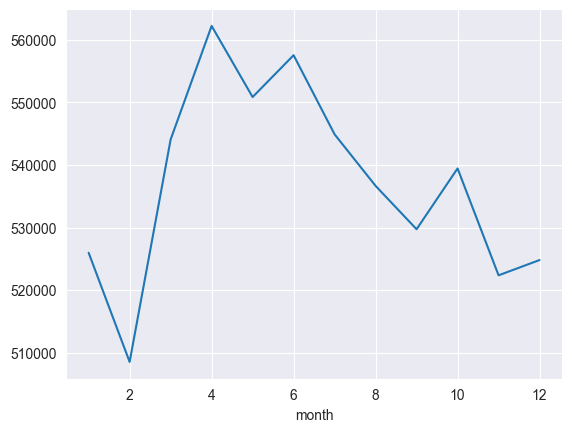

In [51]:
df.groupby('month').mean()['price'].plot()
sns.scatterplot(df.groupby('month').mean()['price'])

In [7]:
df = df.drop('date', axis=1)

In [8]:
#Kolona zipcode je numericka, tako da ce model posmatrati redove tj. prodaje sa vecim zipcodom kao nesto bolje, a zapravo zipcode je kategoricki atribut
#S obzirom da ih ima 70 razlicitih zipcodova dropovacemo kolonu
df['zipcode'].value_counts() #proveravanje koliko ima unikatnih zipcodova
#U realnom slucaju bismo ovo istrazili i kategorisali ih u par klasa (skuplji zipcodovi, jefitniji), geografski ih kategorisali itd...
df = df.drop('zipcode', axis=1)

In [55]:
#Sledece gledamo godinu renoviranja
#Vecina kuca ima vrednost 0 za godinu renoviranja tj. znaci da nije renovirana
#Treba proveriti koliko kuca je renovirano + koji je to procenat od ukupnog skupa
#Model ce ovu 0 mnogo manje vrednovati u odnosu na one kuce koje su renovirane
#Srecna situacija je ta sto postoji velika korelacija izmedju cene i godine renoviranja (skorija godina renoviranja znaci da je cena samim tim veca)
df['yr_renovated'].value_counts()

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1948        1
1951        1
1959        1
1934        1
1944        1
Name: count, Length: 70, dtype: int64

In [58]:
df2 = df
df2['renovated'] = df['yr_renovated']!= 0
df2['not_renovated'] = df['yr_renovated'] == 0  #Deklarisanje novih kolona da je potrebno

In [23]:
df = df.drop('id', axis=1)
print(df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')


In [24]:
# 9. Razdvajanje kolone koje pogadjamo i atributa (X i y) + Train test split 
X = df.drop('price', axis=1).values
y = df['price'].values

In [25]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

In [26]:
#10. Normalizacija
#Normalizujemo samo atribute i to tek posle deljenja podataka cime sprecavamo curenje podataka iz test seta 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) #Fitovanje i transformacija u jednom na trening skupu
X_test = scaler.transform(X_test) #Test set samo transformisemo

In [27]:
X_train.shape

(15117, 19)

In [31]:
#11. Kreiranje modela i dodavanje slojeva
model = Sequential()

#Uglavnom se oslanjamo na broj neurona u slojevima iz same velicine atributnih podataka (feature data)
#Imamo 19 atributa tkd da cemo imati 19 neurona u sloju

#Hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

#Output layer
model.add(Dense(1))

#Kompajliranje modela optimizer adam, funkcija cilja/kriterijum optimalnost mse
model.compile(optimizer='adam', loss='mse') 

In [32]:
#12. Treniranje modela
model.fit(x=X_train,y=y_train, validation_data=(X_test,y_test),
          batch_size=128,epochs=400)      
#batch_size deli podatke u manje clustere/batch-eve. Sto je manji batch_size duze traje treniranje, ali teze cemo overfittovati jer mu ne dajemo sve podatke odjednom 

Epoch 1/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 442965786624.0000 - val_loss: 418931638272.0000
Epoch 2/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 432501325824.0000 - val_loss: 416177356800.0000
Epoch 3/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 429956005888.0000 - val_loss: 391385939968.0000
Epoch 4/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 390482624512.0000 - val_loss: 300673925120.0000
Epoch 5/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 272289628160.0000 - val_loss: 156726378496.0000
Epoch 6/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 144688545792.0000 - val_loss: 97723170816.0000
Epoch 7/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 108915269632.0000 - val_loss: 94464671744.0000
Epoch 8/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 98497626112.0000 - val_loss: 93089456128.0000
Epoch 9/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92155060224.0000 - val_loss: 91740200960.0000
Epoch 10/400
119/119 ━━━━

<Axes: >

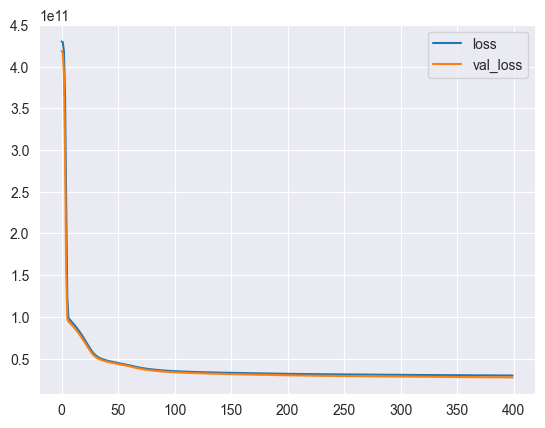

In [36]:
#13. Evaluacija nakon treniranja (plotovanje podataka loss-ova) i analiza
losses = pd.DataFrame(model.history.history)
losses.plot()
#Kada bi val_loss krenuo da se penje to bi znacilo da imamo overfitting i tada treba prekinuti treniranje (early stopping)

In [37]:
#15. Predikcija
y_pred = model.predict(X_test)

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [41]:
#Evaluacija i metrike
mean_absolute_error(y_test, y_pred) #Poredimo test-ne podatke i predvidjeno y
#U proseku model gresi oko 100.000 dolara
#Da li je to dobro?

102030.84524860147

In [44]:
5.402966e+05 * 0.2
#Masimo oko 20%, sto nije bas dobro ali nije ni previse strasn
explained_variance_score(y_test, y_pred)

0.7937870209645836

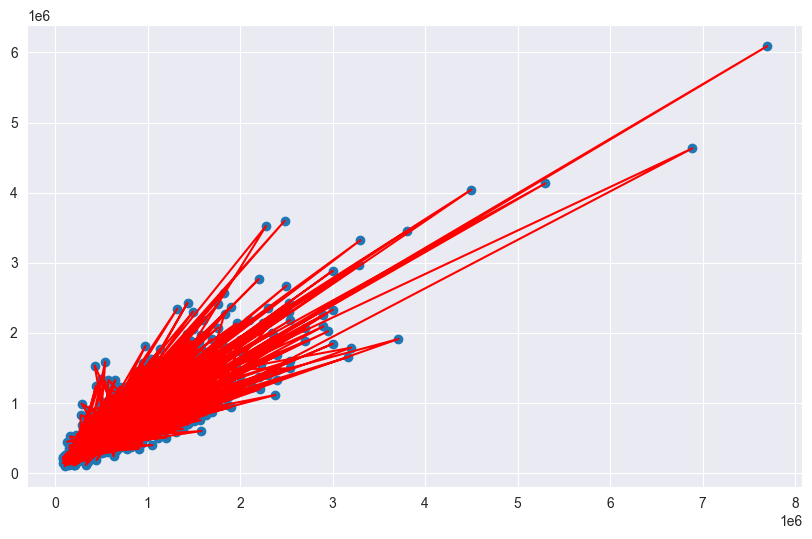

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot(y_test,y_pred, 'r')
#Mozemo zakljuciti da nas model dosta dobro radi na kucama do 2-2.5 miliona
#Muce ga ove kuce koje su outliers
#Trebalo bi probati da treniramo model na onih 99% kuca tj. bez onog 1% najskupljih

In [50]:
#Predikcija na skroz nevidjenoj kuci
single_house = df.drop('price',axis=1).iloc[0]

In [52]:
#Sada treba skalirati atribute ove kuce
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [53]:
model.predict(single_house)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[285552.16]], dtype=float32)

In [56]:
df.head(1)
#Premasujemo preko 80 hiljada
#Ono sto bi trebalo da se uradi je treniranje modela na kucama koje nisu u top 2% po ceni

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
